# RonBot

https://en.wikipedia.org/wiki/User:RonBot

Bot is no longer active, operator has since passed away

tried to look for discussion of malfunctionmost recent talk on user's page is from 2020 and can't find anything there

discussion about brokenimage task possibly being broken in March 2019
https://en.wikipedia.org/wiki/Wikipedia:Bots/Noticeboard/Archive_13#User:RonBot_trouble_possibly_in_need_of_intervention

discussion about footballer category task in July 2018 https://en.wikipedia.org/wiki/Wikipedia:Bot_requests/Archive_76#Association_footballers_not_categorized_by_position


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [4]:
df = pd.read_csv('revs_scored_jan.tsv', sep='\t', header=0)

In [5]:
days = df.rev_timestamp.map(lambda ts: datetime.utcfromtimestamp(ts).day)
df['day'] = days

In [6]:
sdf_ronbot = df[df.day<22]
sdf_ronbot = sdf_ronbot[sdf_ronbot.user_text == "RonBot"]

sdf_reverted = sdf_ronbot[sdf_ronbot.is_reverted] 
sdf_reverted = sdf_reverted[sdf_reverted.seconds_to_revert.astype('str').astype('int')<86400]

In [14]:
sdf1 = sdf_reverted
sdf1.revert_id = sdf1.revert_id.astype('int')

sdf2 = df[df.user_is_bot == False]
sdf2 = sdf2[sdf2.is_revert]

In [15]:
reverts_by_human = pd.merge(sdf1, sdf2, 
             how='inner', 
             left_on='revert_id', 
             right_on='rev_id', 
             suffixes=('', '_reverter')
)

In [16]:
reverts_by_human0 = reverts_by_human[reverts_by_human.page_namespace == 0]

In [17]:
# summary of variables
#   sdf_ronbot = all edits by ronbot w/in time frame
#   sdf_reverted = all reverted edits by ronbot w/in time frame
#   reverts_by_human = all edits of Ronbot that were reverted by a human
#   reverts_by_human0 = all edits by Ronbot in namespace 0 reverted by a human

## sample of edits reverted by humans in namespace 0

In [18]:
len(reverts_by_human0)

429

In [19]:
reverts_by_human0.sample(n=20, random_state=1).reset_index()

,index,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,...,damaging_pred_reverter,goodfaith_pred_reverter,model_version_reverter,user_is_bot_reverter,user_is_trusted_reverter,user_edit_count_reverter,page_rev_count_reverter,page_namespace_reverter,is_page_redirect_reverter,day_reverter
0,346,1546843567,29385861,877208766,876529716,False,RonBot,30498975,377257,4538,...,0.055821,0.963729,0.4.0,False,False,53807,7,0,0,7
1,327,1546843502,51303815,877208664,875942576,False,RonBot,30498975,707030,2974,...,0.060003,0.967055,0.4.0,False,False,53858,4,0,0,7
2,283,1546843223,12807162,877208212,876391387,False,RonBot,30498975,448944,9568,...,0.038749,0.972526,0.4.0,False,False,53707,7,0,0,7
3,396,1546843744,35973301,877209086,876369693,False,RonBot,30498975,459709,2306,...,0.062837,0.958157,0.4.0,False,False,53779,3,0,0,7
4,181,1546840027,58590852,877202703,861433883,False,RonBot,30498975,8790467,2136,...,0.014587,0.985058,0.4.0,False,False,325219,2,0,0,7
5,291,1546843299,15288656,877208346,850839180,False,RonBot,30498975,14940130,4726,...,0.050927,0.969306,0.4.0,False,False,53886,7,0,0,7
6,447,1546884035,6358245,877277070,876406112,False,RonBot,30498975,482437,36104,...,0.016516,0.991789,0.4.0,False,False,162379,11,0,0,7
7,6,1546347551,18984987,876292953,876280891,False,RonBot,30498975,7907,16725,...,0.009056,0.995124,0.4.0,False,False,180648,65,0,0,1
8,361,1546843631,32399720,877208884,875517214,False,RonBot,30498975,961599,14873,...,0.036530,0.973071,0.4.0,False,False,53793,48,0,0,7
9,505,1546884973,42223376,877279563,869540012,False,RonBot,30498975,4273895,6424,...,0.006754,0.992354,0.4.0,False,False,212013,5,0,0,7


0. 877208766 on Adil Mezgour page, for task 7. ronbot adds category (footballers not categorized by position). user inter%anthro undoes it, says position category already present. indeed, article does list category "association football forwards" already
1. 877208664 on Adham El Idrissi page, for task 7. ronbot adds category. user inter&anthro deletes it, says position category already present. indeed, category "association football forwards" is already present.
2. 877208212 on Adamo Coulibaly page, for task 7. ronbot adds category (footballers not categorized by position). user Inter%anthro undoes it, says position category already present. indeed, article does list category "association football forwards" already
3. 877209086 on dif page, for task 7. ronbot adds category (footballers not categorized by position). user Inter%anthro undoes it, says position category already present. indeed, article does list category "association football midfielders" already
4. 877202703 same as above, user GiantSnowman reverts, in midfielders category
5. 877208346 same as above, user inter&anthro reverts, in defenders category, edits are 12 hours apart on Jan 7
6. 877277070 same as above, user Jmorrison230582 reverts, in category forwards, edits are 2 hours apart on Jan 7
7. 876292953 on Eastern world page, RonBot adds broken image template. another user vsmith reverts to edit before alleged vandalism that broke the image ***not a malfunction***. edits about 30 mins apart, on Jan 1.
8. 877208884 same footballer edits, reverting user is Inter&anthro, forwards category already present, edits about 12 hours apart on Jan 7
9. 877279563 same footballer edits, reverting user is walter gorlitz, in category defenders, about 10 mins apart 7 Jan
10. 877208746 same footballer edits, reverting user is Inter&anthro, in category defenders, edits about 11 hours apart on Jan 7
11. 877277582 same footballer edits, reverting user Mattythewhite, in category midfielders,  edits about 7 hours apart on Jan 7
12. 876293084 on Johnny Sins page, RonBot adds a BrokenImage template. user Gotitbro reverts, says no broken image. indeed the image seems to be correct.
13. 879469682 on Daksha page, RonBot adds BrokenImage template (task 12). user KylieTastic reverts to a different edit to fix the name of the image. ***not a malfunction***
14. 877208422 same football edits, reverting user is GiantSnowman, in category midfielders, edits are about 3 hours apart Jan 7
15. 877208840 same football edits, reverting user is inter&anthro, in category defenders, 12 hours apart on Jan 7
16. 877209113 same football edits, reverting user is Inter&anthro, in category defenders, edits about 1 hour apart on Jan 7
17. 877208707 same football edits, reverting user Inter&anthro, in category forwards, edits about 11 hours apart on Jan 7
18. 877201219 same football edits, reverting user Mattythewhite, in category forwards, edits about 20 hours apart. first edit is 30 mins before midnight on 6 Jan, second 18:00 on Jan 7
19. 877207378 same football edits, reverting user Daemonickangaroo2018, in category midfielders,  edits about 13 hours apart on Jan 7

In [40]:
# edits reverted by human
reverts_by_human.groupby("day", as_index=False).count()[["day", "rev_id"]]

,day,rev_id
0,1,9
1,2,1
2,3,4
3,4,39
4,5,46
5,6,18
6,7,419
7,8,8
8,9,8
9,10,14


In [39]:
# these numbers are different from Sokona's below because I did w/in 24 hours, hers are reverted in general
sdf_reverted.groupby("day", as_index=False).count()[["day", "rev_id"]]

,day,rev_id
0,1,11
1,2,1
2,3,4
3,4,39
4,5,46
5,6,18
6,7,419
7,8,8
8,9,8
9,10,14


In [38]:
# total edits
sdf_ronbot.groupby("day", as_index=False).count()[["day","rev_id"]]

,day,rev_id
0,1,187
1,2,163
2,3,243
3,4,230
4,5,235
5,6,148
6,7,2004
7,8,1323
8,9,269
9,10,149


In [28]:
#made a dataframe of all of Ronbots reverted revisions and then of all the humans that are reverting
df_ronbot = sdf_ronbot
reverted_ronbot = df_ronbot[df_ronbot.is_reverted == True]

df_bots = df[df.day < 22]
df_humans = df_bots[df_bots.user_is_bot == False]
df_human_reverters = df_humans[df_humans.is_revert == True]
#ronbot_self_reverts = reverted_ronbot[reverted_ronbot.is_self_revert == True]

In [29]:
#then made a dataframe of all the revisions reverted within 24 hours

df_reverted = df[df.is_reverted]
df_reverted = df_reverted[df_reverted.seconds_to_revert.astype('str').astype('int')<86400]
df_reverted.revert_id = df_reverted.revert_id.astype('int')

In [30]:
#merged to get all the human reverters and who it was reverting (can be bot or human)

df_human_active_reverts = pd.merge(df_reverted, df_human_reverters, 
             how='inner', 
             left_on='revert_id', 
             right_on='rev_id', 
             suffixes=('', '_reverter')
)

In [31]:
#deleted columns I didn't need and then subsetted the dataframe to any revisions of RonBot reverted by a human
df_human_active_reverts = df_human_active_reverts[['rev_id','user_text', 'user_is_bot','revert_id','user_text_reverter', 'is_self_revert_reverter', 'page_namespace','day']]
reverted_ronbot_by_h = df_human_active_reverts[df_human_active_reverts.user_text == "RonBot"]
reverted_ronbot_by_h

,rev_id,user_text,user_is_bot,revert_id,user_text_reverter,is_self_revert_reverter,page_namespace,day
261,876234293,RonBot,True,876263657,180.150.79.160,False,0,1
460,876234459,RonBot,True,876316868,Mrceleb2007,False,0,1
465,876234505,RonBot,True,876317975,CiaPan,False,0,1
468,876234555,RonBot,True,876235497,PhilKnight,False,0,1
1265,876246206,RonBot,True,876322925,Ronhjones,False,6,1
...,...,...,...,...,...,...,...,...
222711,879432509,RonBot,True,879497975,Ronhjones,False,6,21
222727,879432731,RonBot,True,879497997,Ronhjones,False,6,21
225422,879469682,RonBot,True,879469952,KylieTastic,False,0,21
225499,879469692,RonBot,True,879470011,KylieTastic,False,0,21


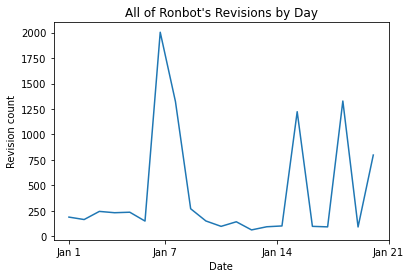

In [32]:
#graph of all of ronbots revisions by day, can clearly see the most was on January 7th
counts, bin_edges = np.histogram(df_ronbot.day, bins=len(set(df_ronbot.day)))
plt.plot(bin_edges[:-1], counts)
plt.ylabel("Revision count")
plt.xlabel("Date")
plt.title("All of Ronbot's Revisions by Day")
plt.xticks(ticks=[1, 7, 14, 21], labels=['Jan 1', 'Jan 7', 'Jan 14', 'Jan 21'])
plt.show()

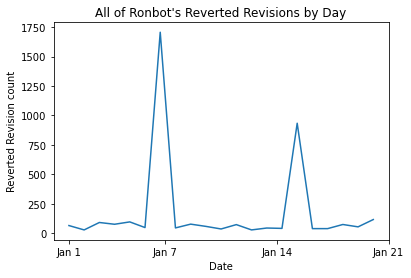

In [33]:
"""graph of all of ronbots reverted revisions by day, can clearly see the most was on January 7th, out of ~2000 total edits, 
~1750 were reverted on that day (~87%)"""
counts, bin_edges = np.histogram(reverted_ronbot.day, bins=len(set(reverted_ronbot.day)))
plt.plot(bin_edges[:-1], counts)
plt.ylabel("Reverted Revision count")
plt.xlabel("Date")
plt.title("All of Ronbot's Reverted Revisions by Day")
plt.xticks(ticks=[1, 7, 14, 21], labels=['Jan 1', 'Jan 7', 'Jan 14', 'Jan 21'])
plt.show()

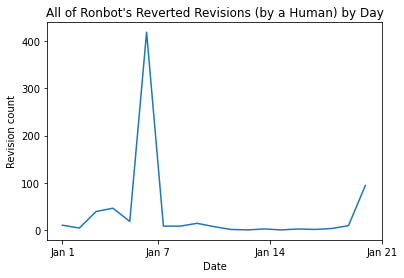

In [34]:
"""graph of all of ronbots reverted revisions by a human by day, can clearly see the most was on January 7th, out of ~2000 total edits,
~1750 were reverted on that day (~87%), and out of all reverted revisions, 400 (~20%) were reverteed by humans"""
counts, bin_edges = np.histogram(reverted_ronbot_by_h.day, bins=len(set(reverted_ronbot_by_h.day)))
plt.plot(bin_edges[:-1], counts)
plt.ylabel("Revision count")
plt.xlabel("Date")
plt.title("All of Ronbot's Reverted Revisions (by a Human) by Day")
plt.xticks(ticks=[1, 7, 14, 21], labels=['Jan 1', 'Jan 7', 'Jan 14', 'Jan 21'])
plt.show()